In [1]:
import torch
import torch.optim as optim
import numpy as np
import random
from collections import defaultdict
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [20]:
# create list of frequencies

# class Env1(object):
#     def __init__(self, T:int, omega:float, c:float, A:float):
#         self.T = T
#         self.omega = omega
#         self.c = c
#         self.eps = 10**-5
#         self.t = 0
        
class Options:
    """Class containing all parameters"""
    def __init__(self):
        # Env params
        self.T = 8
        self.omegas = [0.1,0.5,1,2,5,10]
        self.c = 1
        self.eps = 10**-5
        self.A = 2
        self.t = 0
        self.lr = 1e-3
        self.timesteps = 50
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        
opt = Options()

def f(x:torch.Tensor, t:int, omega:float):
    return alpha(t,omega) * (x.pow(2))
    
def alpha(t:int, omega:torch.Tensor):
    if t <= opt.T:
        return opt.c
    return (opt.A/2) * (1 + torch.sin(omega*t) + opt.eps)

In [21]:
random.seed(42)
torch.manual_seed(42)
adam_deltas = defaultdict(list)
sgd_deltas = defaultdict(list)

for omega in opt.omegas:
    omega_tensor = torch.Tensor([omega])
    
    x_adam = torch.Tensor([2]) #torch.randn(1)
    x_sgd = x_adam.clone()
    x_adam.requires_grad_(True)
    x_sgd.requires_grad_(True)
    
    adam_opt = optim.Adam([x_adam], lr=opt.lr)
    sgd_opt = optim.SGD([x_sgd], lr=opt.lr)
    
    for t in range(opt.timesteps):
        # Perform Adam and SGD steps
        y_adam = f(x_adam, t, omega_tensor)
        adam_opt.zero_grad()
        y_adam.backward()
        adam_opt.step()
        
        y_sgd = f(x_sgd, t, omega_tensor)
        sgd_opt.zero_grad()
        y_sgd.backward()
        sgd_opt.step()
        
        # Append to results
        adam_deltas[omega].append(abs(x_adam.detach().item()))
        sgd_deltas[omega].append(abs(x_sgd.detach().item()))

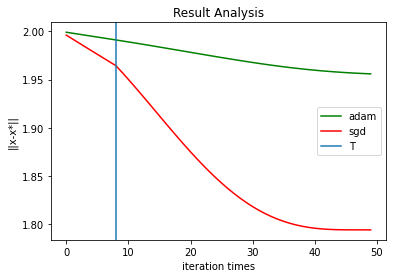

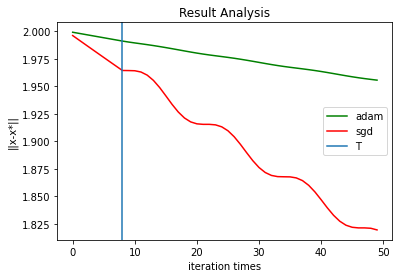

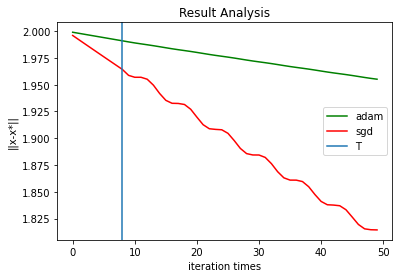

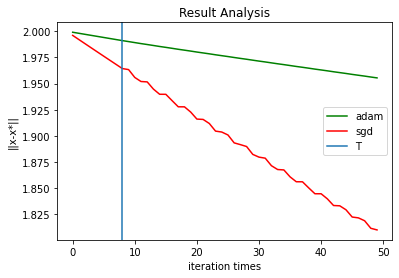

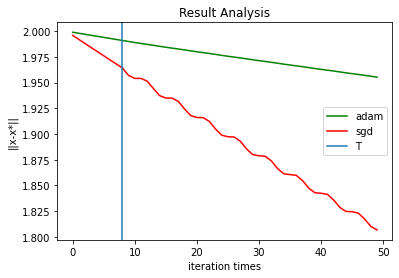

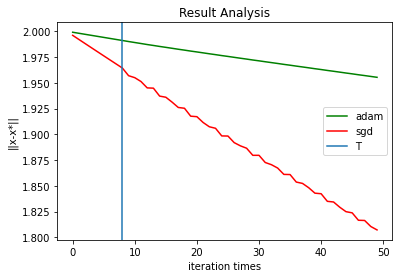

In [22]:
import numpy as numpy
import matplotlib as mpl
import matplotlib.pyplot as plt

for omega in opt.omegas:
    x = numpy.array(adam_deltas[omega])
    y = numpy.array(sgd_deltas[omega])
    L = numpy.array(list(range(opt.timesteps)))
    plt.title('Result Analysis')
    plt.plot(L, x, color='green', label='adam')
    plt.plot(L, y, color='red', label='sgd')
    plt.axvline(opt.T, label='T')
    plt.legend() 
    plt.xlabel('iteration times')
    plt.ylabel('||x-x*||')
    plt.show()